## **Практическая работа №2**

### Вариант 6

Таблица находится в конце файла. Так же все файлы проекта (в том числе отчёт в формате odt или pdf) можно скачать с git: https://git.dm1sh.ru/data-visualization/practice2

Изначально проект писался в vscode под линуксом, если не работает установка пакетов в первом блоке, попробуйте заменить % на ! или установить пакеты вручную и удалить его

1. Подгружаем нужные для работы пакеты

In [1]:
# установка matplotlib, numpy и pandas
%pip install matplotlib numpy pandas seaborn --upgrade


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

2. Загружаем данные. Они представляют результаты эксперимента по выявлению дефектов в подшипниковых узлах жидкостного трения. Время эксперимента 10 мин. Частота получения данных о колебаниях ротора 1000 сиг/сек. Частота съема данных о температуре 1 сиг/сек.
В работе используются набор данных с и без дефектов. Задача: выявить выбросы в данных, найти переходный период, в течение которого система выходит на режим, выяснить, в каких атрибутах наиболее ярко выражаются отличия в экспериментах с дефектами и без, а так же можно ли на этапе переходного периода говорить о наличии дефекта.

- Набор данных без дефектов

In [3]:
df_norm = pd.read_csv('./data_5_1.csv')
display(df_norm.info())
display(df_norm.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

None

Fluctuations_X_in_the_left_bearing  Fluctuations_Y_in_the_left_bearing  \
count                       601000.000000                       601000.000000   
mean                             5.455242                            6.335448   
std                              0.084957                            0.100096   
min                              5.032000                            5.818000   
25%                              5.388000                            6.263000   
50%                              5.463000                            6.332000   
75%                              5.521000                            6.410000   
max                              6.089000                            7.171000   

       Fluctuations_X_in_the_right_bearing  \
count                        601000.000000   
mean                              5.691674   
std                               0.079720   
min                               5.152000   
25%                               5.635000   
50%                               5.692000   
75%                               5.749000   
max                               6.362000   

       Fluctuations_Y_in_the_right_bearing  \
count                        601000.000000   
mean                              7.220008   
std                               0.077585   
min                               6.745000   
25%                               7.164000   
50%                               7.212000   
75%                               7.276000   
max                               8.006000   

       Fluctuations_X_in_the_left_bearing_smooth  \
count                              601000.000000   
mean                                    5.455247   
std                                     0.071788   
min                                     5.201000   
25%                                     5.390000   
50%                                     5.465000   
75%                                     5.520000   
max                                     5.744000   

       Fluctuations_Y_in_the_left_bearing_smooth  \
count                              601000.000000   
mean                                    6.335445   
std                                     0.081333   
min                                     6.022000   
25%                                     6.264000   
50%                                     6.331000   
75%                                     6.407000   
max                                     6.734000   

       Fluctuations_X_in_the_right_bearing_smooth  \
count                               601000.000000   
mean                                     5.691669   
std                                      0.065328   
min                                      5.442000   
25%                                      5.636000   
50%                                      5.691000   
75%                                      5.744000   
max                                      6.001000   

       Fluctuations_Y_in_the_right_bearing_smooth  \
count                               601000.000000   
mean                                     7.220007   
std                                      0.063549   
min                                      6.993000   
25%                                      7.165000   
50%                                      7.211000   
75%                                      7.274000   
max                                      7.578000   

       Temperature_in_the_left_bearing  Temperature_in_the_right_bearing  
count                    601000.000000                     601000.000000  
mean                       1108.853443                       1112.852181  
std                           4.983924                          5.274466  
min                        1091.353000                       1100.433000  
25%                        1106.737000                       1109.069000  
50%                        1110.546000                       1113.650000  
75%                        1

- Набор данных с наличием несоосности в муфте

In [4]:
df_misal = pd.read_csv('./data_4_2.csv')
display(df_misal.info())
display(df_misal.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

None

Fluctuations_X_in_the_left_bearing  Fluctuations_Y_in_the_left_bearing  \
count                       601000.000000                       601000.000000   
mean                             4.984535                            6.652319   
std                              0.069982                            0.108803   
min                              4.526000                            6.121000   
25%                              4.935000                            6.572000   
50%                              4.995000                            6.636000   
75%                              5.027000                            6.738000   
max                              5.635000                            7.505000   

       Fluctuations_X_in_the_right_bearing  \
count                        601000.000000   
mean                              5.795459   
std                               0.088409   
min                               5.345000   
25%                               5.733000   
50%                               5.795000   
75%                               5.860000   
max                               6.544000   

       Fluctuations_Y_in_the_right_bearing  \
count                        601000.000000   
mean                              7.310637   
std                               0.088030   
min                               6.751000   
25%                               7.257000   
50%                               7.303000   
75%                               7.371000   
max                               8.087000   

       Fluctuations_X_in_the_left_bearing_smooth  \
count                              601000.000000   
mean                                    4.984530   
std                                     0.052889   
min                                     4.773000   
25%                                     4.942000   
50%                                     4.995000   
75%                                     5.021000   
max                                     5.298000   

       Fluctuations_Y_in_the_left_bearing_smooth  \
count                              601000.000000   
mean                                    6.652318   
std                                     0.092470   
min                                     6.324000   
25%                                     6.573000   
50%                                     6.636000   
75%                                     6.735000   
max                                     7.047000   

       Fluctuations_X_in_the_right_bearing_smooth  \
count                               601000.000000   
mean                                     5.795455   
std                                      0.075171   
min                                      5.541000   
25%                                      5.734000   
50%                                      5.792000   
75%                                      5.856000   
max                                      6.114000   

       Fluctuations_Y_in_the_right_bearing_smooth  \
count                               601000.000000   
mean                                     7.310634   
std                                      0.075327   
min                                      6.959000   
25%                                      7.261000   
50%                                      7.302000   
75%                                      7.370000   
max                                      7.654000   

       Temperature_in_the_left_bearing  Temperature_in_the_right_bearing  
count                    601000.000000                     601000.000000  
mean                       1107.421877                       1114.138790  
std                           3.960030                          5.357683  
min                        1100.641000                       1100.666000  
25%                        1103.898000                       1110.323000  
50%                        1107.961000                       1115.154000  
75%                        1

- Набор данных с наличием дисбаланса

In [5]:
df_disbal = pd.read_csv('./data_4_3.csv')
display(df_disbal.info())
display(df_disbal.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

None

Fluctuations_X_in_the_left_bearing  Fluctuations_Y_in_the_left_bearing  \
count                       601000.000000                       601000.000000   
mean                             5.459564                            6.337034   
std                              0.094292                            0.104977   
min                              4.979000                            5.824000   
25%                              5.382000                            6.256000   
50%                              5.458000                            6.336000   
75%                              5.539000                            6.419000   
max                              6.118000                            7.173000   

       Fluctuations_X_in_the_right_bearing  \
count                        601000.000000   
mean                              5.668791   
std                               0.081341   
min                               5.212000   
25%                               5.608000   
50%                               5.674000   
75%                               5.729000   
max                               6.346000   

       Fluctuations_Y_in_the_right_bearing  \
count                        601000.000000   
mean                              7.144426   
std                               0.079577   
min                               6.661000   
25%                               7.086000   
50%                               7.151000   
75%                               7.200000   
max                               7.888000   

       Fluctuations_X_in_the_left_bearing_smooth  \
count                              601000.000000   
mean                                    5.459570   
std                                     0.082518   
min                                     5.187000   
25%                                     5.383000   
50%                                     5.459000   
75%                                     5.537000   
max                                     5.756000   

       Fluctuations_Y_in_the_left_bearing_smooth  \
count                              601000.000000   
mean                                    6.337033   
std                                     0.087532   
min                                     6.022000   
25%                                     6.258000   
50%                                     6.336000   
75%                                     6.416000   
max                                     6.742000   

       Fluctuations_X_in_the_right_bearing_smooth  \
count                               601000.000000   
mean                                     5.668790   
std                                      0.067253   
min                                      5.414000   
25%                                      5.611000   
50%                                      5.675000   
75%                                      5.725000   
max                                      5.985000   

       Fluctuations_Y_in_the_right_bearing_smooth  \
count                               601000.000000   
mean                                     7.144428   
std                                      0.065966   
min                                      6.892000   
25%                                      7.089000   
50%                                      7.151000   
75%                                      7.198000   
max                                      7.448000   

       Temperature_in_the_left_bearing  Temperature_in_the_right_bearing  
count                    601000.000000                     601000.000000  
mean                       1109.347354                       1108.257027  
std                           3.584635                          3.298593  
min                        1097.972000                       1100.383000  
25%                        1108.479000                       1106.538000  
50%                        1110.300000                       1109.447000  
75%                        1

- Набор данных со втулкой с дефектами

In [6]:
df_defect = pd.read_csv('./data_4_4.csv')
display(df_defect.info())
display(df_defect.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

None

Fluctuations_X_in_the_left_bearing  Fluctuations_Y_in_the_left_bearing  \
count                       601000.000000                       601000.000000   
mean                             5.343087                            6.470311   
std                              0.092243                            0.082721   
min                              4.882000                            5.900000   
25%                              5.266000                            6.417000   
50%                              5.346000                            6.476000   
75%                              5.419000                            6.522000   
max                              6.073000                            7.247000   

       Fluctuations_X_in_the_right_bearing  \
count                        601000.000000   
mean                              6.011416   
std                               0.071645   
min                               5.614000   
25%                               5.964000   
50%                               6.003000   
75%                               6.062000   
max                               6.747000   

       Fluctuations_Y_in_the_right_bearing  \
count                        601000.000000   
mean                              7.066158   
std                               0.072093   
min                               6.548000   
25%                               7.021000   
50%                               7.060000   
75%                               7.110000   
max                               7.795000   

       Fluctuations_X_in_the_left_bearing_smooth  \
count                              601000.000000   
mean                                    5.343089   
std                                     0.079303   
min                                     5.044000   
25%                                     5.268000   
50%                                     5.348000   
75%                                     5.417000   
max                                     5.656000   

       Fluctuations_Y_in_the_left_bearing_smooth  \
count                              601000.000000   
mean                                    6.470312   
std                                     0.058977   
min                                     6.205000   
25%                                     6.419000   
50%                                     6.476000   
75%                                     6.519000   
max                                     6.814000   

       Fluctuations_X_in_the_right_bearing_smooth  \
count                               601000.000000   
mean                                     6.011420   
std                                      0.056743   
min                                      5.792000   
25%                                      5.967000   
50%                                      6.001000   
75%                                      6.056000   
max                                      6.300000   

       Fluctuations_Y_in_the_right_bearing_smooth  \
count                               601000.000000   
mean                                     7.066161   
std                                      0.054376   
min                                      6.859000   
25%                                      7.024000   
50%                                      7.059000   
75%                                      7.107000   
max                                      7.413000   

       Temperature_in_the_left_bearing  Temperature_in_the_right_bearing  
count                    601000.000000                     601000.000000  
mean                       1109.685379                       1106.292003  
std                           5.512947                          5.618381  
min                        1092.609000                       1085.364000  
25%                        1106.780000                       1103.882000  
50%                        1111.812000                       1109.040000  
75%                        1

3. На основании приведённого выше описания, можно сказать, что pandas верно справился с определением типа - все 10 параметров имеют вещественный (float64) тип данных. Что соответствует исходным данным:
 
- 1 столбец массива - `Fluctuations_X_in_the_left_bearing` - горизонтальные колебания в левом подшипнике, в Вольтах

- 2 столбец массива - `Fluctuations_Y_in_the_left_bearing` - вертикальные колебания в левом подшипнике, в Вольтах

- 3 столбец массива - `Fluctuations_X_in_the_right_bearing` - горизонтальные колебания в правом подшипнике, в
Вольтах

- 4 столбец массива - `Fluctuations_Y_in_the_right_bearing` - вертикальные колебания в правом подшипнике подшипнике, в Вольтах

- 5 столбец массива - `Fluctuations_X_in_the_left_bearing_smooth` - горизонтальные колебания в левом подшипнике с учетом сглаживания, в Вольтах

- 6 столбец массива - `Fluctuations_Y_in_the_left_bearing_smooth` - вертикальные колебания в левом подшипнике с учетом сглаживания, в Вольтах

- 7 столбец массива - `Fluctuations_X_in_the_right_bearing_smooth` - горизонтальные колебания в правом подшипнике с учетом сглаживания, в Вольтах

- 8 столбец массива - `Fluctuations_Y_in_the_right_bearing_smooth` - вертикальные колебания в правом подшипнике подшипнике с учетом сглаживания, в Вольтах

- 9 столбец массива - `Temperature_in_the_left_bearing` - температура в левом подшипнике, в Омах

- 10 столбец массива - `Temperature_in_the_right_bearing` - температура в правом подшипнике, в Омах

In [7]:
# Для удобства итерации создадим кортежи с датафреймами, их читабельными именами для подписей и цветами
dfs = (df_norm, df_misal, df_disbal, df_defect)
df_names = ("Без дефектов", "Несоосность в трубке", "Дисбаланс", "Втулка с дефектом")
df_colors = ("tab:blue", "tab:orange", "tab:red", "tab:purple")

# Шкала времени для 1000 зап/сек
time = np.arange(0, df_norm.shape[0]/1000, 0.001)

import itertools as itt
pic_n_gen = itt.count(1) # Счётчик для номеров рисунков

## Линейные графики

4. Построим линейные графики для флуктуаций и температур для каждого из наборов данных

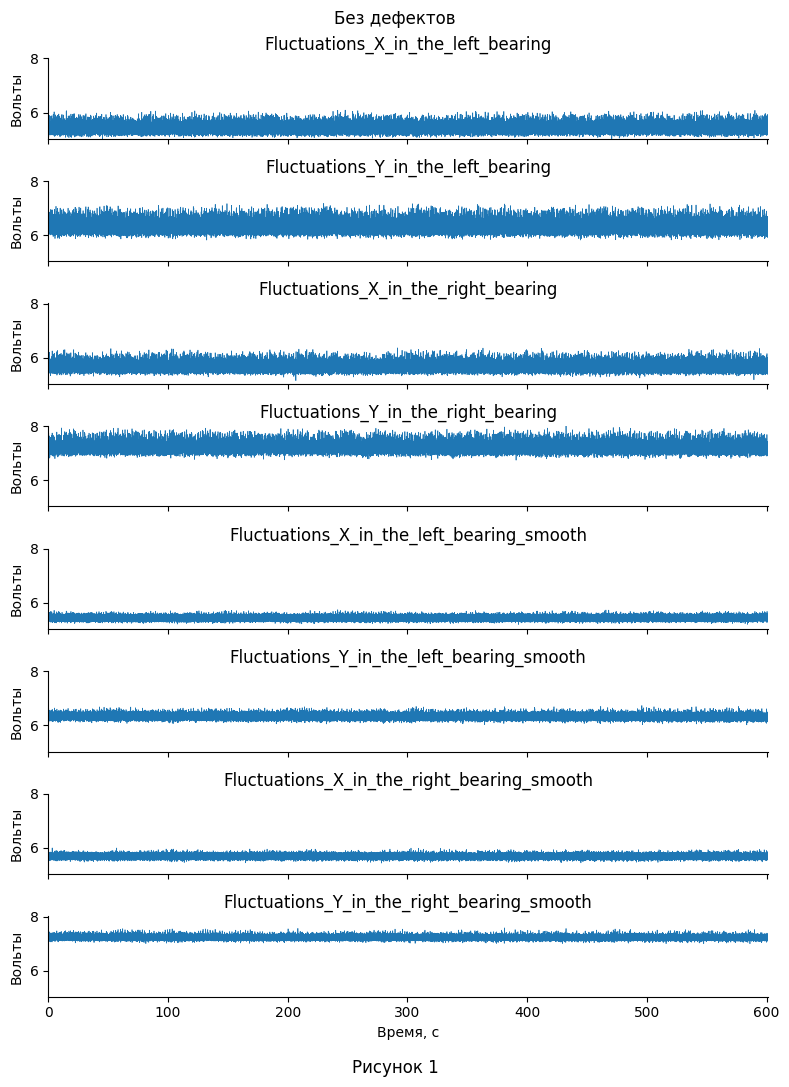

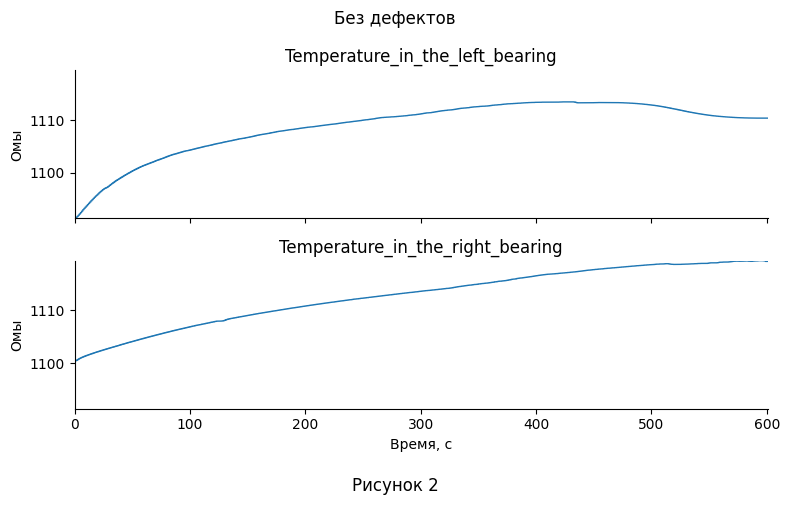

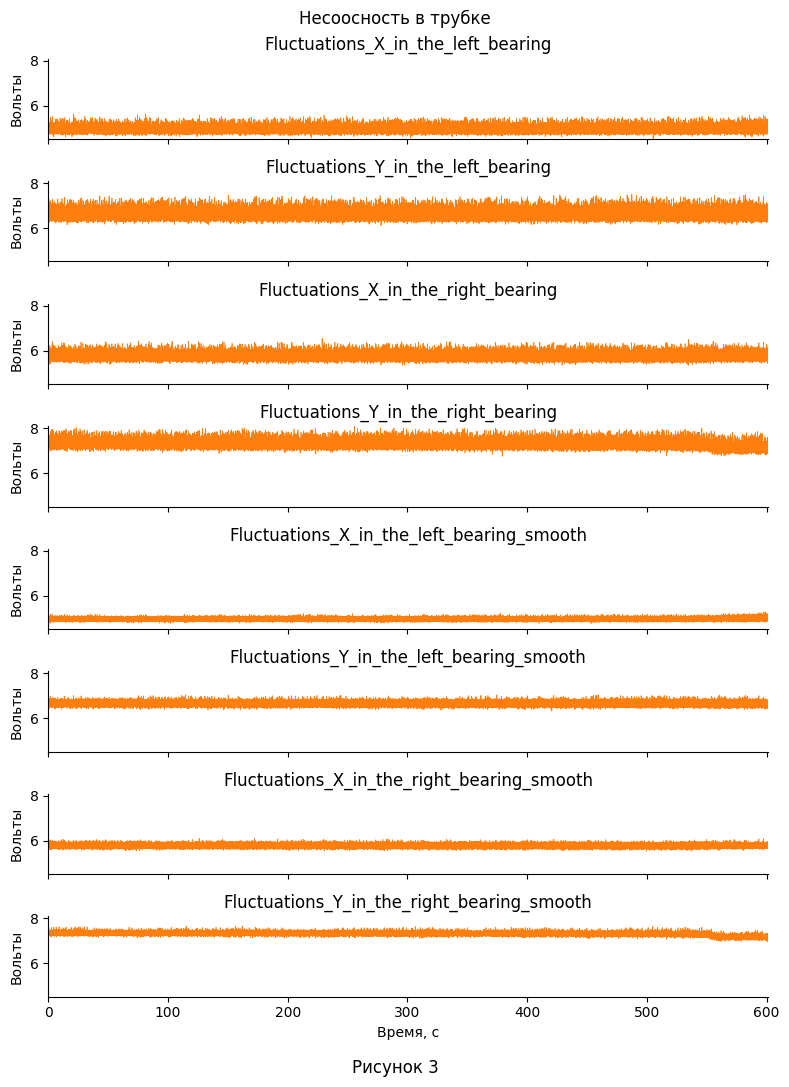

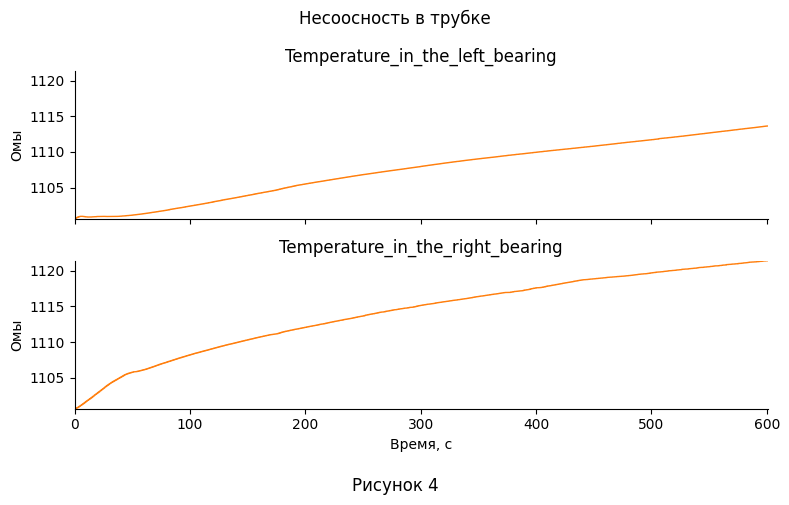

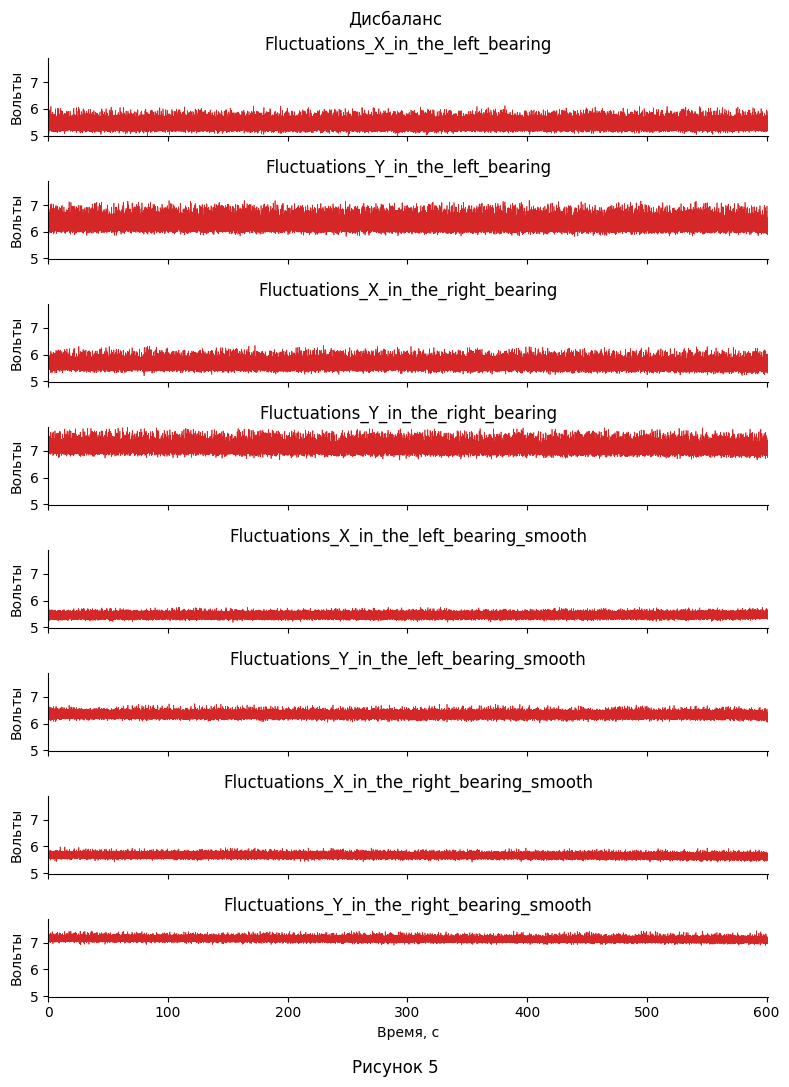

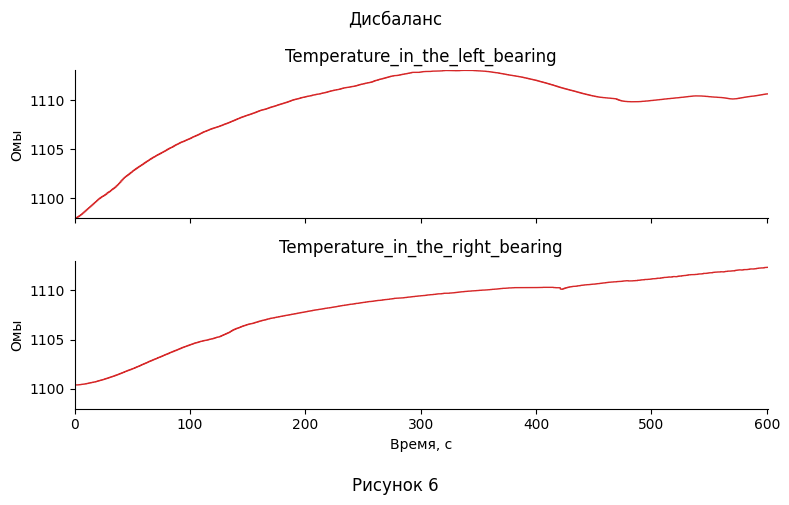

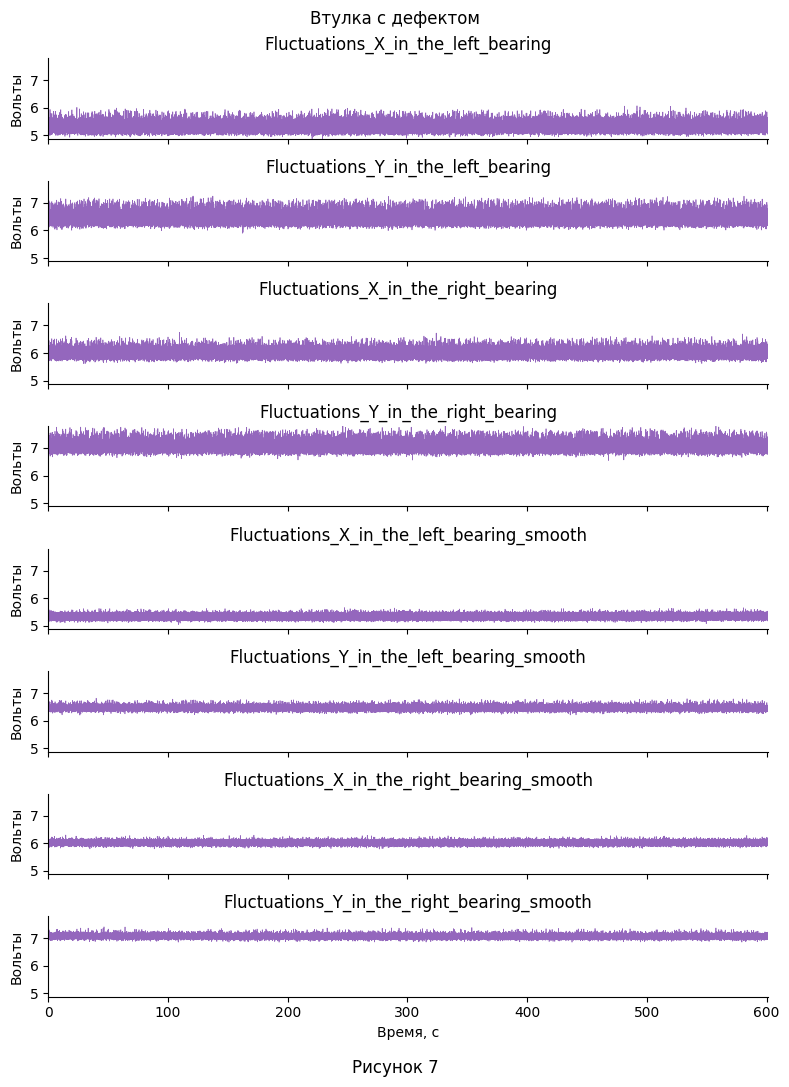

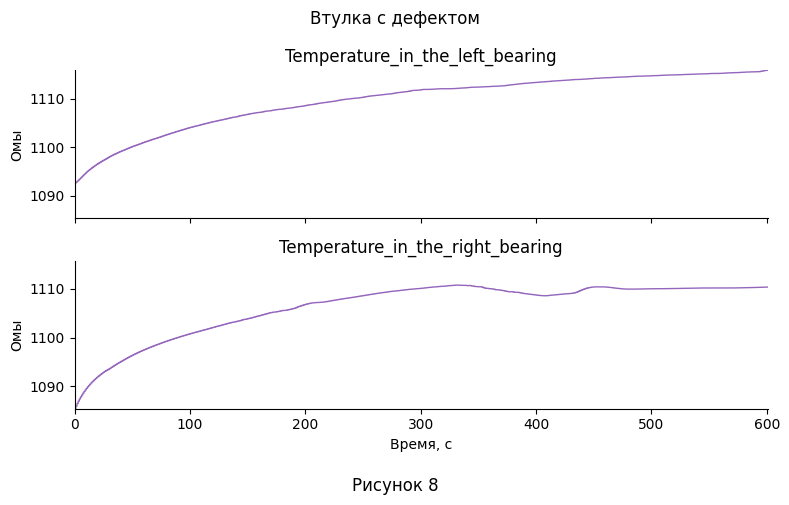

In [8]:
a4figsize = (8, 11) # размер листа А4 в дюймах

def plot_linear(df, fields, suptitle, xcoord, ylabel, ylim, figsize = a4figsize, linewidth=0.5, color=None):
    fig, ax = plt.subplots(len(fields), figsize=figsize, sharex=True, sharey=True)

    fig.suptitle(suptitle)
    fig.supxlabel(f"Рисунок {next(pic_n_gen)}")

    for j, field in enumerate(fields):
        ax[j].plot(xcoord, df[field], linewidth=linewidth, color=color)

        ax[j].set_ylabel(ylabel)
        ax[j].set_title(field)

        ax[j].spines['top'].set_visible(False)
        ax[j].spines['right'].set_visible(False)

        ax[j].set_xlim((np.min(xcoord), np.max(xcoord)))
        ax[j].set_ylim(ylim)

    ax[-1].set_xlabel("Время, с")

    fig.tight_layout()

for i, df in enumerate(dfs):
    plot_linear(
        df,
        fields=df.keys()[:-2],
        suptitle=df_names[i],
        xcoord=time,
        ylabel="Вольты",
        ylim=(np.min(df.min()[:-2]), np.max(df.max()[:-2])), # растягиваем график на всю высоту флуктуаций при одинаковых границах для всех
        color=df_colors[i]
    )

    plot_linear(
        df,
        fields=df.keys()[-2:],
        suptitle=df_names[i],
        xcoord=time,
        ylabel="Омы",
        ylim=(np.min(df.min()[-2:]), np.max(df.max()[-2:])), # растягиваем график на всю высоту температур при одинаковых границах для всех
        figsize=(8,5),
        linewidth=1,
        color=df_colors[i]
    )

5. Из построенных графиков видно, что линейное представление флуктуаций несёт мало информации, поэтому в дальнейшем будут исследоваться только распределение и корреляция между этими признаками. С другой стороны, график температуры имеет ясно различимую временную зависимость, поэтому для него имеет смысл рассмотреть её, а так же корреляцию.

## Распределение флуктуаций

6. Как отмечалось в предыдущем пункте, проанализируем распределение для полей, отражающих флуктуации. Первым делом визуализируем данные с помощью так называемого "Ящика с усами". На каждом графике отобразим одну из четырёх флуктуаций и сглаженную версию для каждого набора данных.

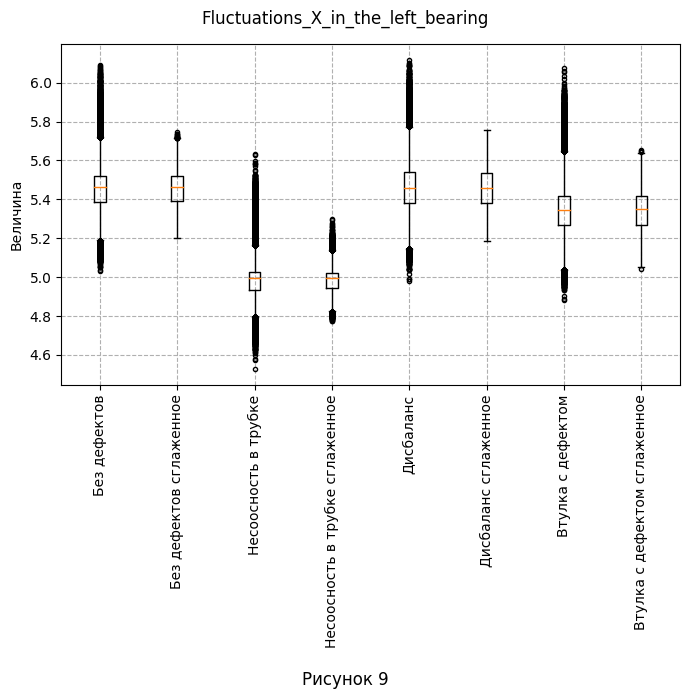

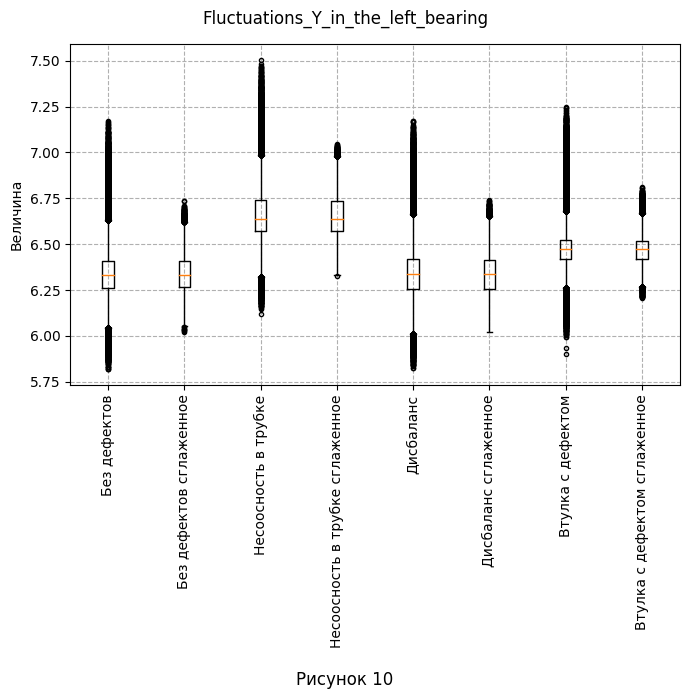

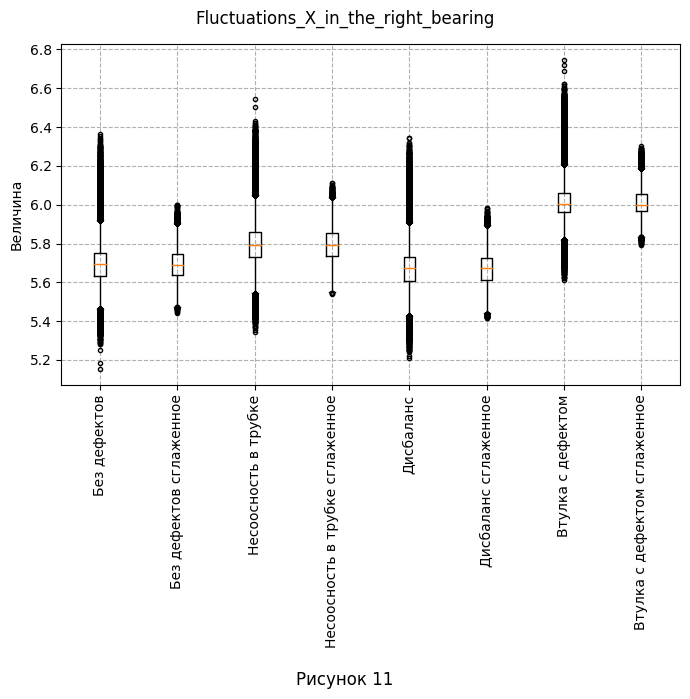

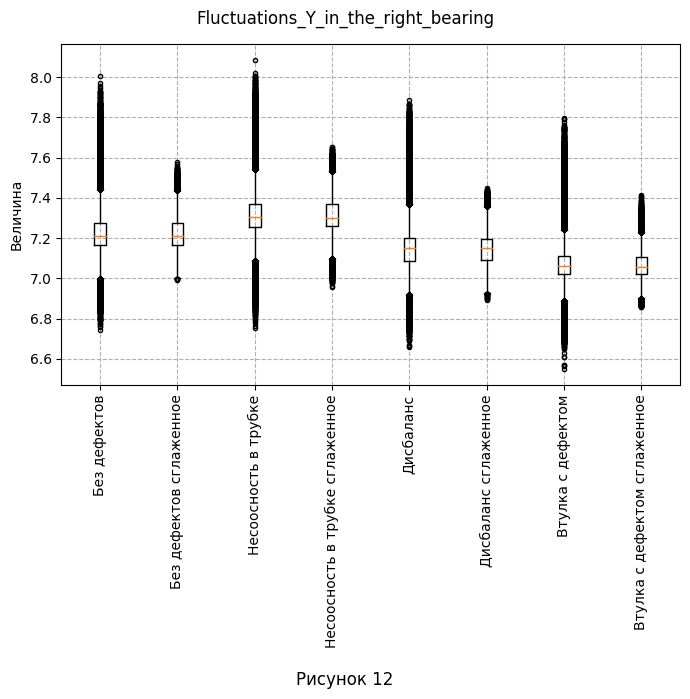

In [9]:
for i in range(4):
    fig, ax = plt.subplots(figsize=(7, 7))
    plt.xticks(rotation=90)

    fig.suptitle(df_norm.keys()[i])
    fig.supxlabel(f"Рисунок {next(pic_n_gen)}")

    flierprops = dict(marker='o', markersize=3)

    for j, df in enumerate(dfs):
        ax.boxplot(df[df.keys()[i]], positions=[j*2], flierprops=flierprops)
        ax.boxplot(df[df.keys()[i+4]], positions=[j*2+1], flierprops=flierprops)
    
    ax.set_ylabel("Величина")
    ax.set_xticks(range(8), itt.chain.from_iterable((df_names[j], df_names[j]+" сглаженное") for j in range(4)))

    ax.grid(linestyle='--')

    fig.tight_layout()

7. Из визуализации видно, что несглаженные данные имеют одиночные выбросы - отдельные окружности, не сливающиеся с соседними. Поэтому при дальнейшей работе есть смысл использовать сглаженные данные, так как они дают более широкую гистаграмму, чем позволяют лучше видеть диапазон принимаемых значений и уменьшают количество выбросов. Так же сгруппируем графики по параметрам колонок 5-8. На каждом графике изобразим одновременно распределение с и без дефектов. Заметим, что нам не так уж важны конкретные значения, поэтому, для урупнения изображений было принято решение не делать общей шкалу величины.

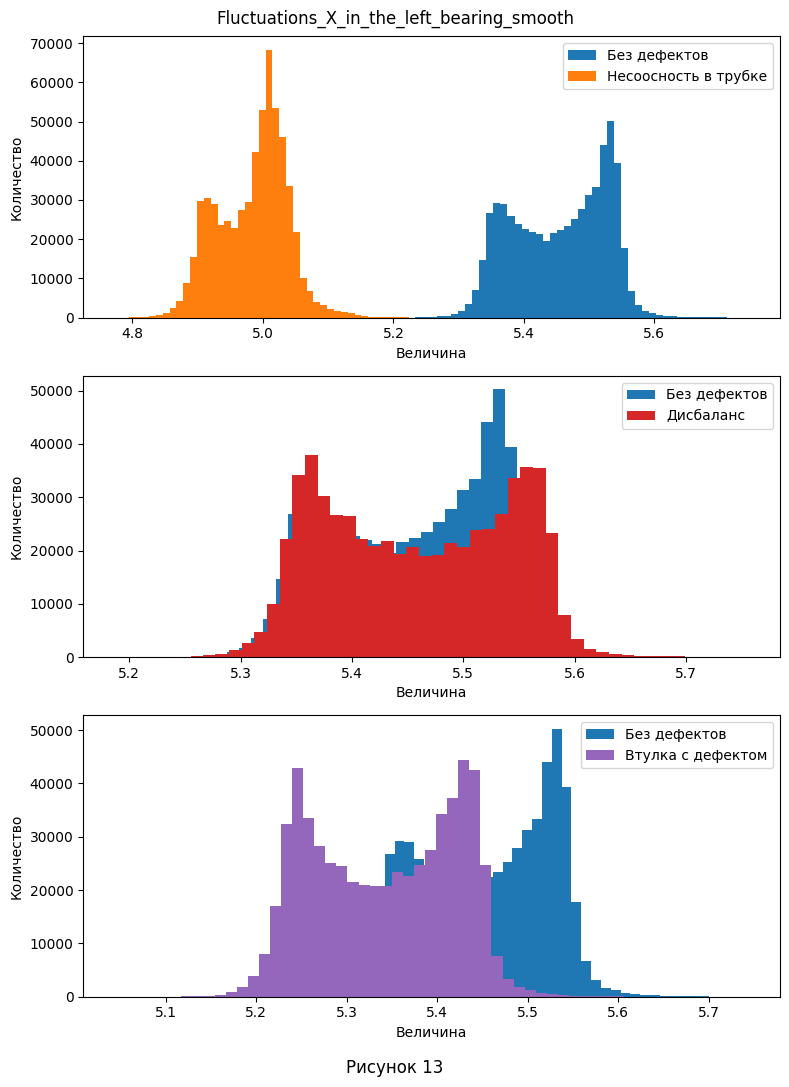

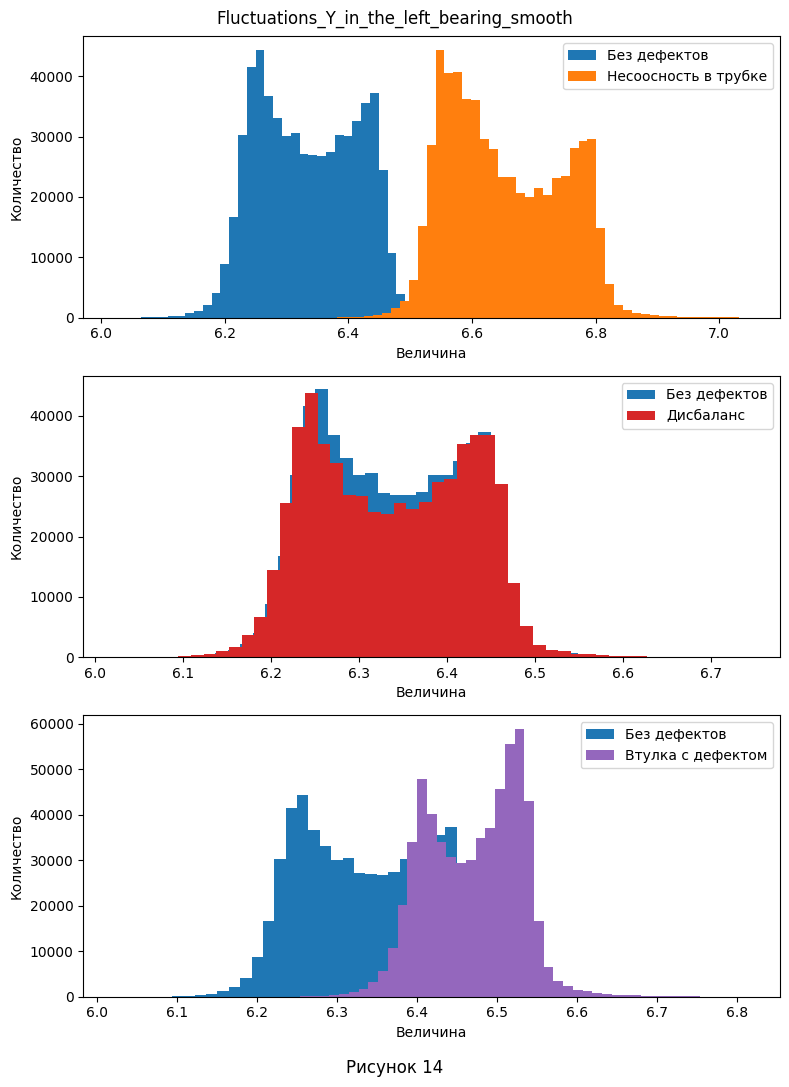

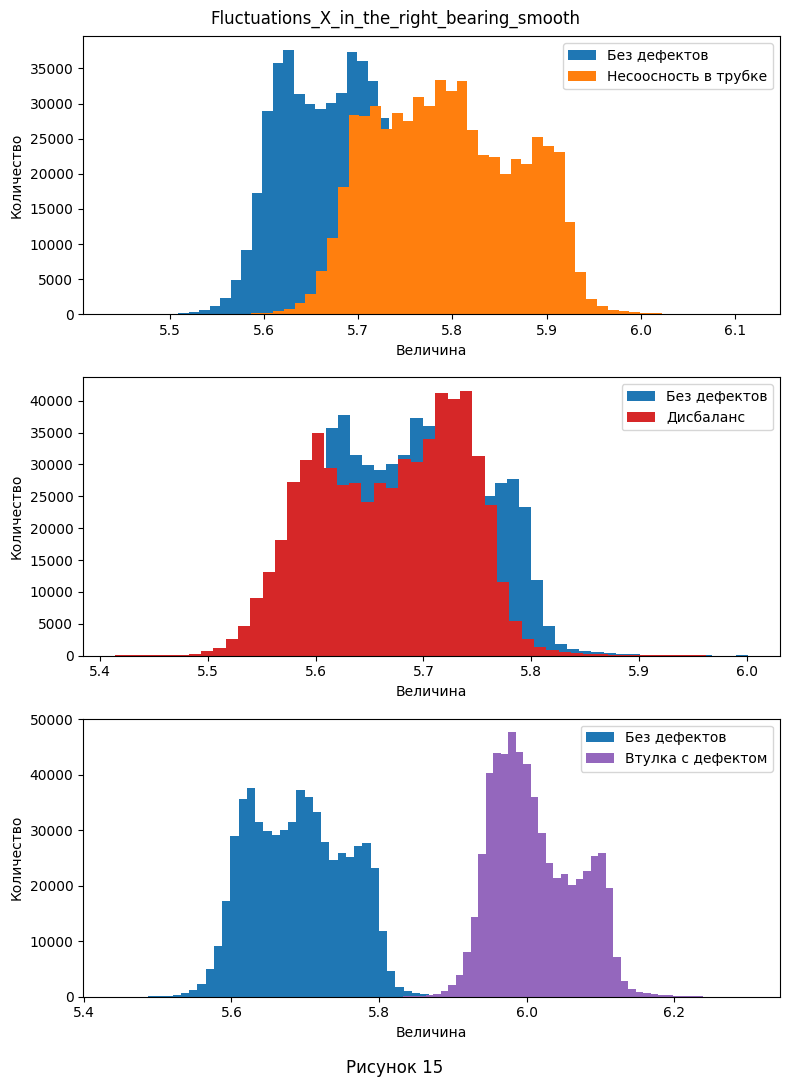

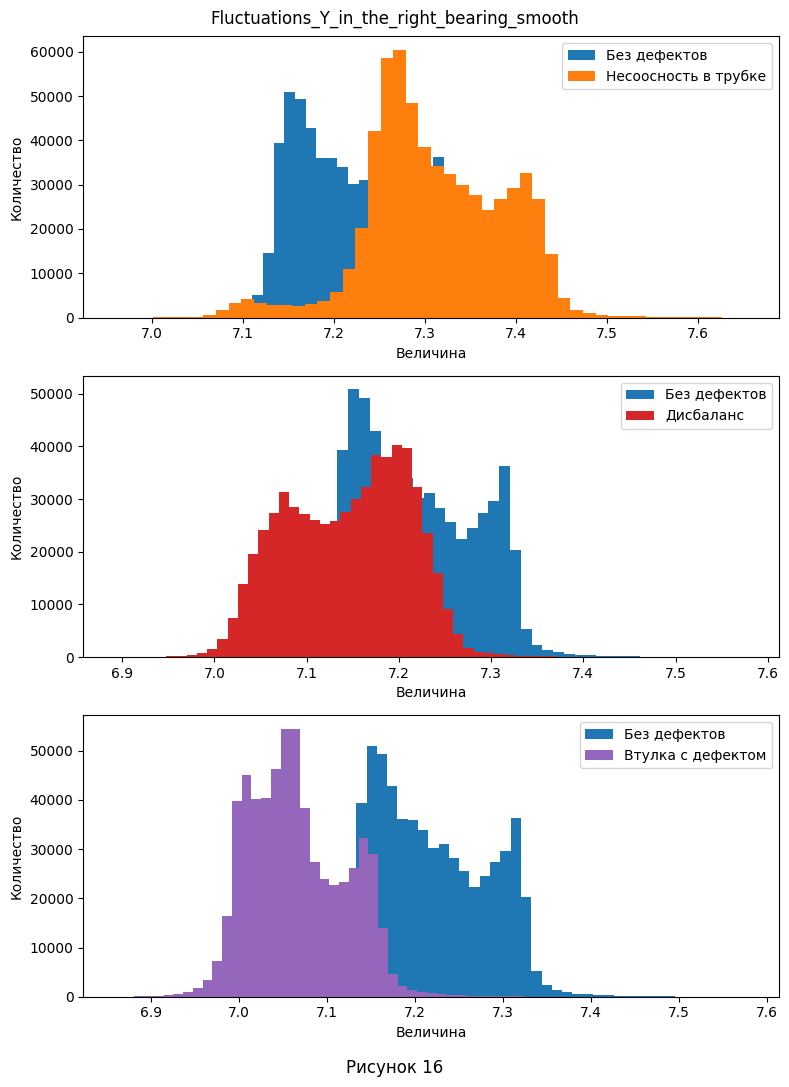

In [10]:
for i, field in enumerate(df_norm.keys()[4:-2]):
    fig, ax = plt.subplots(3, 1, figsize=a4figsize)

    fig.suptitle(field)
    fig.supxlabel(f"Рисунок {next(pic_n_gen)}")

    for j, df in enumerate(dfs[1:]):
        ax[j].hist(df_norm[field], bins=50, label=df_names[0], color=df_colors[0])
        ax[j].hist(df[field], bins=50, label=df_names[j+1], color=df_colors[j+1])

        ax[j].set_xlabel("Величина")
        ax[j].set_ylabel("Количество")

        ax[j].legend()

    fig.tight_layout()

8. Из построенной визуализации уже можно сделать некоторые выводы о том, какие признаки меняются при определённых дефектах.

- Например, видно, что при несоосности в трубке, значительные отклонения по величине наблюдаются в левом подшипнике, в то время когда в правом смещение видно в меньшей степени.

- При дисбалансе, отклонения по форме и величине распределения видны только по оси Y в правом подшипнике, а остальные параметры практически совпадают.

- Если же проблема в дефектах втулки, тогда все параметры смещаются в большую или меньшую сторону, при этом сохраняя в общих чертах свою форму, не считая оси X в правом подшипнике.

## Линейный анализ температуры

9. Теперь перейдём к анализу температуры подшипников. Для этого снова изобразим линейные графики для каждого дефекта, наложив на них соответствующие значения для нормы.

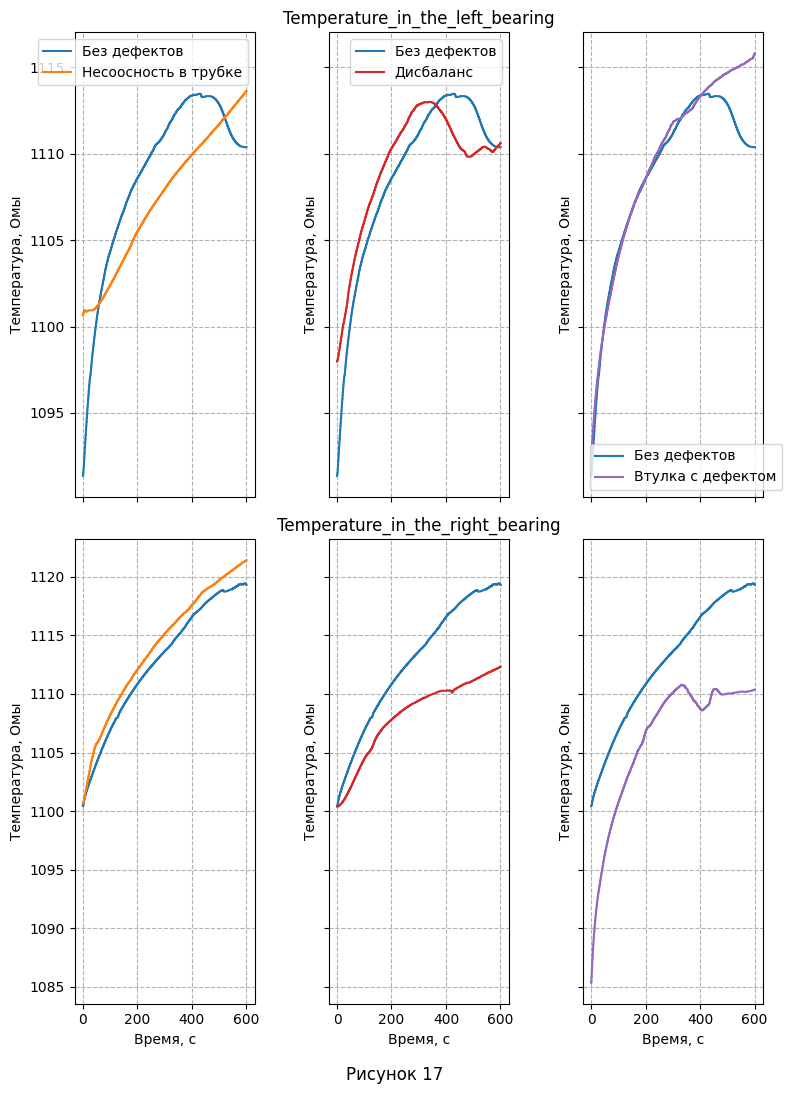

In [12]:
fig, ax = plt.subplots(2, 3, figsize=a4figsize, sharex=True, sharey='row')

# fig.suptitle(df_names[i+1])
fig.supxlabel(f"Рисунок {next(pic_n_gen)}")

for i, df in enumerate(dfs[1:]):
    for j, field in enumerate(df.keys()[-2:]):
        ax[j][i].plot(time, df_norm[field], color=df_colors[0], label=df_names[0])
        ax[j][i].plot(time, df[field], color=df_colors[i+1], label=df_names[i+1])

        if i == 1:
            ax[j][i].set_title(field)

        ax[j][i].set_ylabel("Температура, Омы")

        ax[j][i].grid(linestyle='--')

    ax[0][i].legend()

    ax[-1][i].set_xlabel("Время, с")

fig.tight_layout()

10. Если смотреть на график температуры прибора без дефектов, можно увидеть обвал, начавшийся для левого подшипника на 400-ой секунде, а для правого на 500-ой. Однако, неизвестно, остановился ли рост температуры после этого, поэтому судить об окончании перехожного процесса непросто. При этом, даже если считать, что первые 400 секунд система для левой и 500 для правой входила в режим работы, ввиду однородности флуктуаций, что видно на рис. 1,3,5,7, те выводы, что были сделаны для их распределения в пункте 8, остаются в силе. Что каается температуры, на основании её изменения, так же можно сделать некоторые наблюдения:

- При несоосности в трубке, на левом подшипнике наблюдается более линейно растущий график, при этом около 500-ой секунды он пересекает нормальный график и не останавливает свой рост. Температура для правого несколько больше на всём временном отрезке и также не замедляет рост после 500-ой секунды

- Дисбаланс характеризуется более высокими температурами, но при этом более коротким переходным режимом на левом подшипнике. При этом, на правом температура наоборот значительно ниже, что так же видно с самого начала наблюдений.

- Дефектная втулка выдаёт себя только на правом подшипнике - опять же, более низкими температурами на правом подшипнике. Но, возможно, это происходит из-за гораздо более низкой начальной температуры (это можно отнести к ошибкам измерения). При этом, температурная кривая для левого подшипника практически идеально повторяет нормальную, но только до конца переходного процесса, после чего продолжает расти несмотря на его конец.

## Матрица корреляции

11. Наконец, построим матрицу корреляции для выявления корреляции между параметрами нормальных и имеющими дефекты наборами. Нам не интересна внутренняя корреляция, поэтому берём только корреляцию между разными наборами.

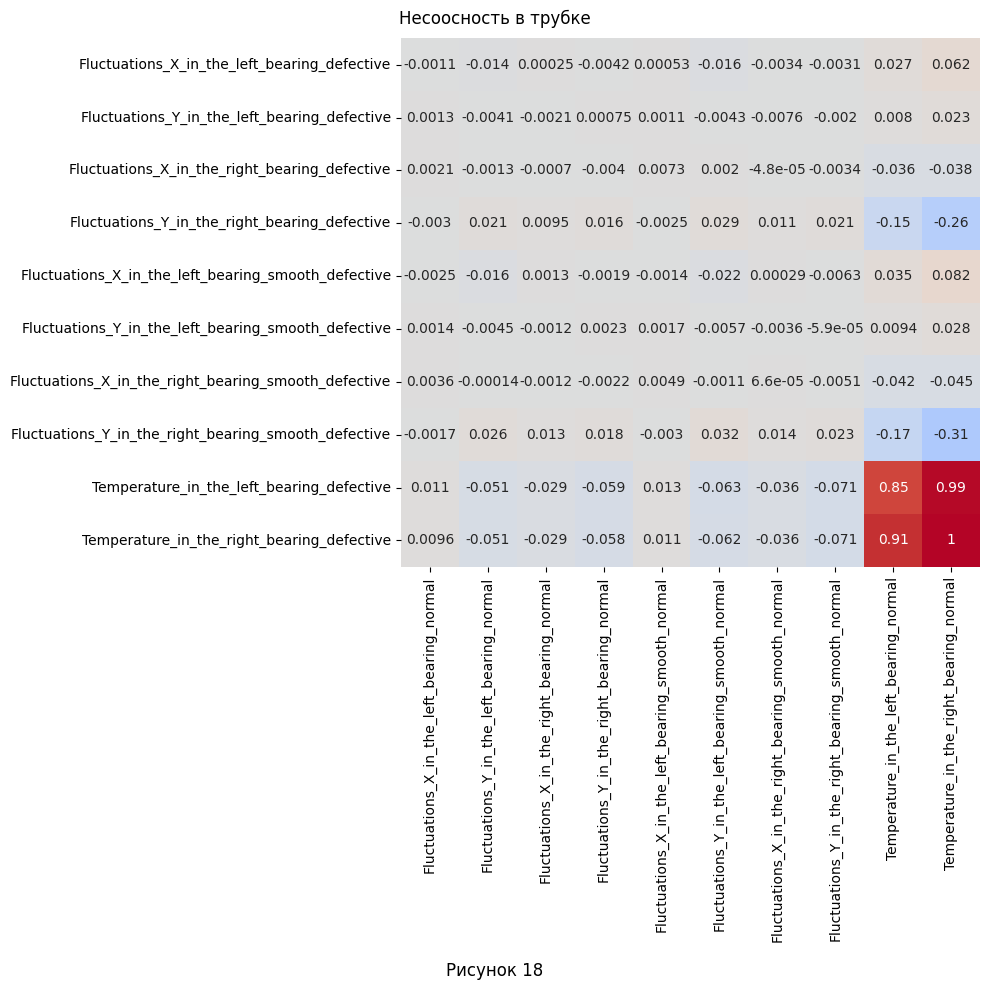

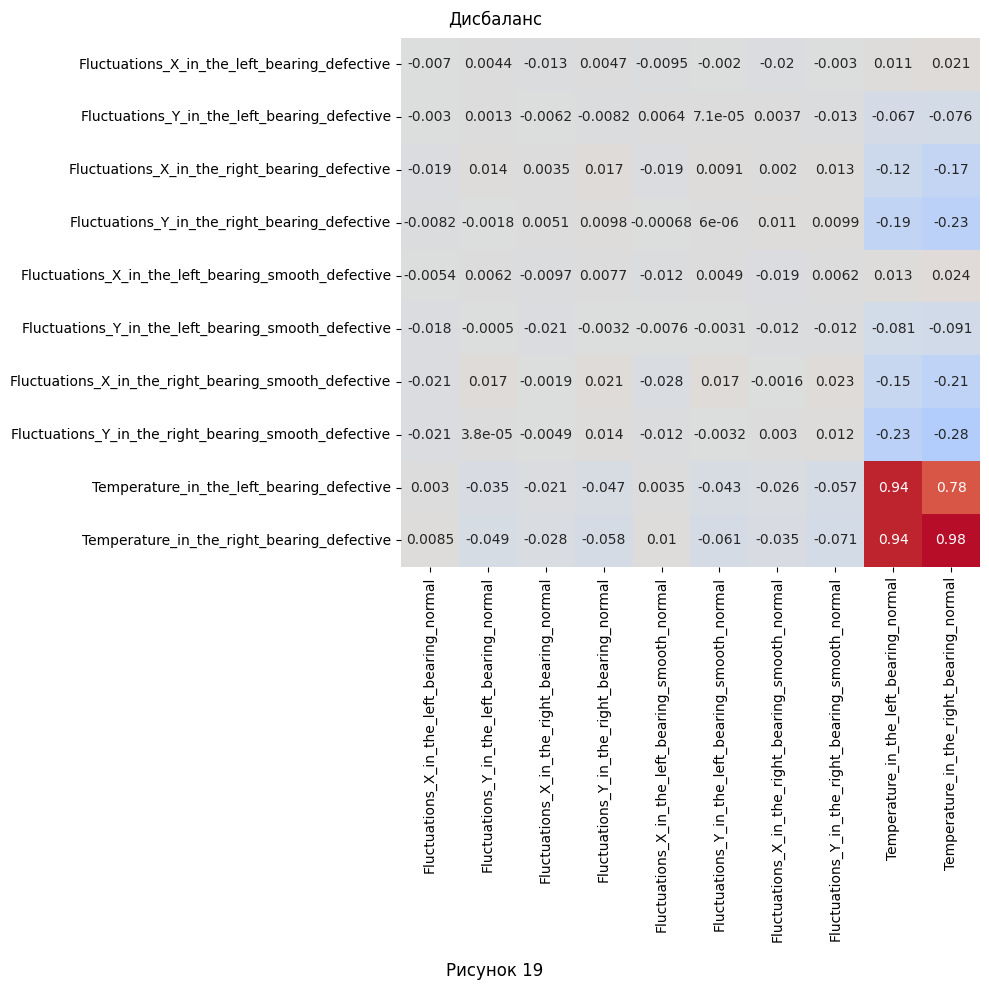

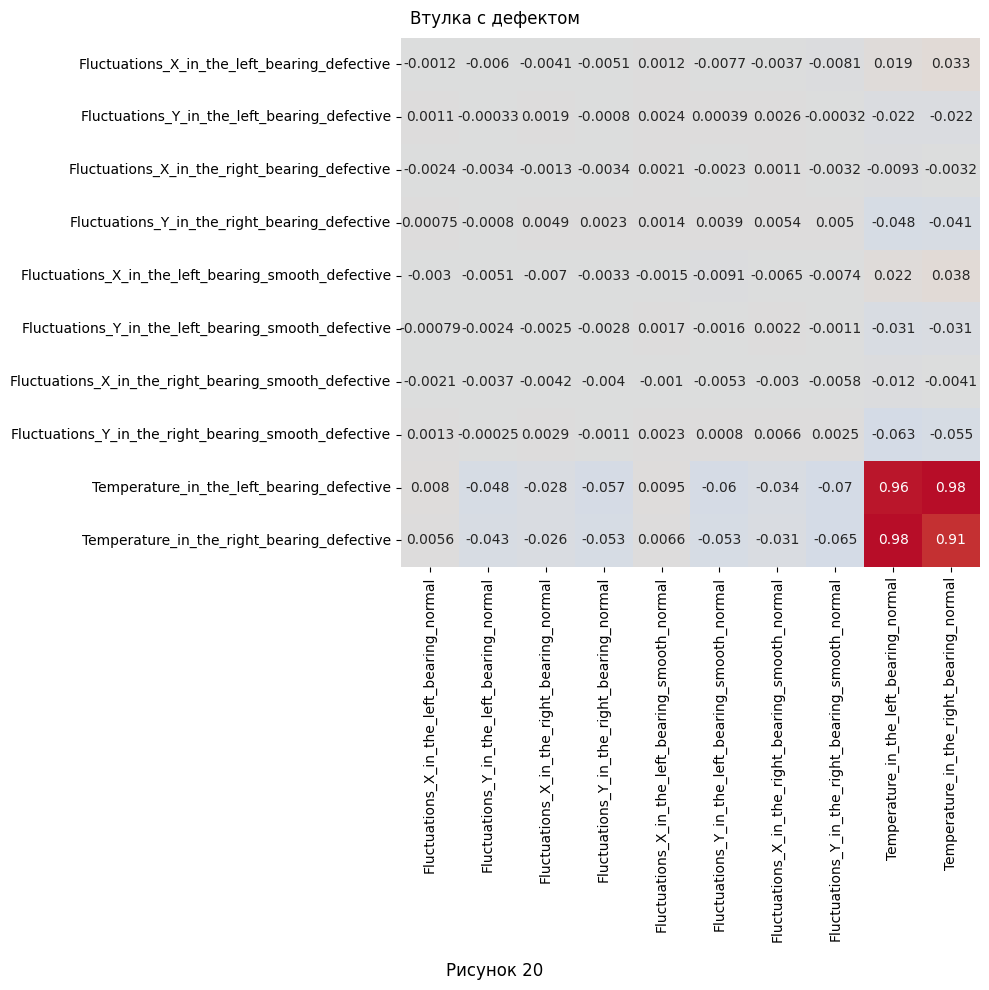

In [13]:
for i, df in enumerate(dfs[1:]):
    fig, ax = plt.subplots(figsize=(10,10))

    df_j = df.join(df_norm, lsuffix="_defective", rsuffix="_normal")

    corr = df_j.corr()

    corr = corr[filter(lambda key: key.count("_normal"), corr.keys())]

    corr = corr[np.array(list(map(lambda key: key.count("_defective") == 1, corr.index)),dtype=bool)]

    sns.heatmap(
        corr,
        cbar=False,
        ax=ax,
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1
    )

    fig.suptitle(df_names[i+1])
    fig.supxlabel(f"Рисунок {next(pic_n_gen)}")

    fig.tight_layout()

Таблица. Критерии оценки визуализации, и примерные вопросы для их оценивания

| Вопрос | Ответ |
|--------|-------|
| 1.Для каждого параметра определен тип, и в зависимости его типа представлены различные описательные статистики. | В каждом наборе имеются по 10 параметров вещественного типа (float64): Fluctuations_X_in_the_left_bearing, Fluctuations_Y_in_the_left_bearing, *Fluctuations_X_in_the_right_bearing*, *Fluctuations_Y_in_the_right_bearing*, *Fluctuations_X_in_the_left_bearing_smooth*, *Fluctuations_Y_in_the_left_bearing_smooth*, *Fluctuations_X_in_the_right_bearing_smooth*, *Fluctuations_Y_in_the_right_bearing_smooth*, *Temperature_in_the_left_bearing*, *Temperature_in_the_right_bearing*. <br> В файле ipynb в пункте 2 представлены в табличном виде некоторые описательные характеристики этих полей для каждого из наборов данных, такие как количество элементов 601000, среднее, стандартное отклонение, минимум и максимум, 25% и 75% квартили, медиана. <br> Из графиков на рис. 1-8 видно, что линейное представление флуктуаций несёт мало информации, поэтому в дальнейшем будут исследоваться только распределение (рис. 13-16) и корреляция (рис. 18-20) между этими признаками. С другой стороны, график температуры имеет ясно различимую временную зависимость, поэтому для него имеет смысл рассмотреть её (рис. 17), а так же корреляцию (рис. 18-20). |
| 2. Есть ли выбросы в данных. Если да, укажите в каких атрибутах. | Из рис. 9-12 видно, что несглаженные данные имеют одиночные выбросы - отдельные окружности, не сливающиеся с соседними. <br> - *Fluctuations_X_in_the_left_bearing* для несоосности в трубке, дисбаланса и втулки с дефектом <br>- *Fluctuations_Y_in_the_left_bearing* для несоосности в трубке и втулке с дефектом <br>- *Fluctuations_X_in_the_right_bearing* для без дефекта, несоосности в трубке, дисбаланса и втулки с дефектом <br>- *Fluctuations_Y_in_the_right_bearing* для без дефекта, несоосности в трубке, дисбаланса и втулки с дефектом <br> Поэтому при дальнейшей работе есть смысл использовать сглаженные данные, так как они дают более широкую гистаграмму, чем позволяют лучше видеть диапазон принимаемых значений и уменьшают количество выбросов. |
| 3. Есть ли переходный период, в течение которой система выходит на режим. <br>Если да, укажите его длительность (можно указать число записей, которые описывают этот переходный период). | Если смотреть на график температуры прибора без дефектов (рис. 17), можно увидеть обвал, начавшийся для левого подшипника на 400-ой секунде, а для правого на 500-ой. Однако, неизвестно, остановился ли рост температуры после этого, поэтому судить об окончании перехожного процесса непросто. |
| 4. Определите, какие атрибуты наиболее сильно отличаются в экспериментах с дефектами, от нормальных значений. | Из построенной визуализации на рис. 13-16 для распределения флуктуаций: <br>- Видно, что при несоосности в трубке, значительные отклонения по величине наблюдаются в левом подшипнике, в то время когда в правом смещение видно в меньшей степени. <br>- При дисбалансе, отклонения по форме и величине распределения видны только по оси Y в правом подшипнике, а остальные параметры практически совпадают. <br>- Если же проблема в дефектах втулки, тогда все параметры смещаются в большую или меньшую сторону, при этом сохраняя в общих чертах свою форму, не считая оси X в правом подшипнике. <br>Из графиков для температуры (рис. 19) <br>- При несоосности в трубке, на левом подшипнике наблюдается более линейно растущий график, при этом около 500-ой секунды он пересекает нормальный график и не останавливает свой рост. Температура для правого несколько больше на всём временном отрезке и также не замедляет рост после 500-ой секунды. <br>- Дисбаланс характеризуется более высокими температурами, но при этом более коротким переходным режимом на левом подшипнике. При этом, на правом температура наоборот значительно ниже, что так же видно с самого начала наблюдений. <br>- Дефектная втулка выдаёт себя только на правом подшипнике - опять же, более низкими температурами на правом подшипнике. Но, возможно, это происходит из-за гораздо более низкой начальной температуры (это можно отнести к ошибкам измерения). При этом, температурная кривая для левого подшипника практически идеально повторяет нормальную, но только до конца переходного процесса, после чего продолжает расти несмотря на его конец. |
| 5. Можно ли на этапе переходного периода говорить о наличии дефекта? Какие признаки на это могут указывать? | Если считать, что первые 400 секунд система для левой и 500 для правой входила в режим работы, ввиду однородности флуктуаций, что видно на рис. 1,3,5,7, те выводы, что были сделаны для их распределения в предыдущем вопросе, остаются в силе. Не считая тех частей кривых температур (рис. 17), которые лежат дальше 500 с: <br>- При несоосности в трубке, на левом подшипнике, около 500-ой секунды график пересекает нормальный график и не останавливает свой рост. Температура для также не замедляет рост после 500-ой секунды. <br>- У дефектной втулки температурная кривая для левого подшипника по окончанию переходного процесса, после чего продолжает расти несмотря на его конец. |